In [19]:
import pandas as pd
df=pd.read_csv('HRDataset_v13.csv')

In [20]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [36]:
from datetime import datetime
from datetime import date

df.drop(columns=['Employee_Name','ManagerName','DaysLateLast30'])
#not all employees are managers
df['ManagerID'].fillna(0)
#not all employees have a termination date, some might be permanent
df['DateofTermination'].fillna(0)
""""#we see here, that DOB is of no use, but age is of use to us, so let's convert DOB to age
def calculate_age(born):
    born = datetime.strptime(born, "%m/%d/%y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

#df['age'] = df['DOB'].apply(calculate_age)
df['LastPerformanceReview_time'] = df['LastPerformanceReview_Date'].apply(calculate_age)
df['LastPerformanceReview_time'].fillna(0)"""

'"#we see here, that DOB is of no use, but age is of use to us, so let\'s convert DOB to age\ndef calculate_age(born):\n    born = datetime.strptime(born, "%m/%d/%y").date()\n    today = date.today()\n    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))\n\n#df[\'age\'] = df[\'DOB\'].apply(calculate_age)\ndf[\'LastPerformanceReview_time\'] = df[\'LastPerformanceReview_Date\'].apply(calculate_age)\ndf[\'LastPerformanceReview_time\'].fillna(0)'

In [46]:
df=df.drop(columns=['DeptID','ManagerID','MaritalDesc','TermReason','Termd'])
#termReason,termd is highly correlated to EmpStatusID
#MaritalStatusId is highly correlated to MaritalDesc

KeyError: "['DeptID' 'ManagerID' 'MaritalDesc' 'TermReason'] not found in axis"

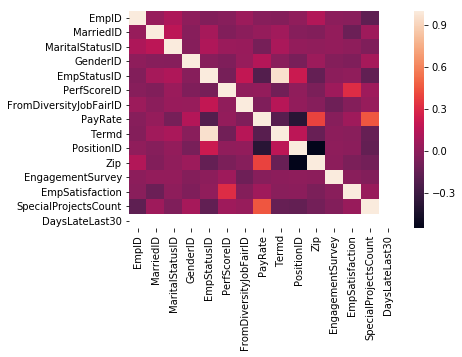

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
cor=df.corr()
sns.heatmap(cor)
plt.show()

In [ ]:
df=pd.get_dummies(df)

In [16]:
df.astype(float)

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,...,LastPerformanceReview_Date_2/22/2019,LastPerformanceReview_Date_2/25/2019,LastPerformanceReview_Date_2/26/2019,LastPerformanceReview_Date_2/27/2019,LastPerformanceReview_Date_2/28/2019,LastPerformanceReview_Date_2/4/2019,LastPerformanceReview_Date_2/5/2019,LastPerformanceReview_Date_2/6/2019,LastPerformanceReview_Date_2/7/2019,LastPerformanceReview_Date_2/8/2019
0,1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7.110077e+08,1.0,1.0,0.0,5.0,1.0,3.0,1.0,20.50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.504073e+09,1.0,1.0,0.0,5.0,6.0,3.0,0.0,55.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.403066e+09,0.0,0.0,0.0,1.0,6.0,3.0,0.0,55.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.408069e+09,0.0,0.0,0.0,1.0,6.0,1.0,0.0,55.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.306059e+09,1.0,1.0,1.0,1.0,6.0,3.0,0.0,56.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
len(df)

401

In [9]:
df2=df.dropna()
len(df2)

199

In [10]:
df.fillna(0)

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,...,LastPerformanceReview_Date_2/22/2019,LastPerformanceReview_Date_2/25/2019,LastPerformanceReview_Date_2/26/2019,LastPerformanceReview_Date_2/27/2019,LastPerformanceReview_Date_2/28/2019,LastPerformanceReview_Date_2/4/2019,LastPerformanceReview_Date_2/5/2019,LastPerformanceReview_Date_2/6/2019,LastPerformanceReview_Date_2/7/2019,LastPerformanceReview_Date_2/8/2019
0,1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,...,0,0,0,0,0,0,0,0,0,0
5,7.110077e+08,1.0,1.0,0.0,5.0,1.0,3.0,1.0,20.50,1.0,...,0,0,0,0,0,0,0,0,0,0
6,1.504073e+09,1.0,1.0,0.0,5.0,6.0,3.0,0.0,55.00,1.0,...,0,0,0,0,0,0,0,0,0,0
7,1.403066e+09,0.0,0.0,0.0,1.0,6.0,3.0,0.0,55.00,0.0,...,0,0,0,0,0,0,0,0,0,0
8,1.408069e+09,0.0,0.0,0.0,1.0,6.0,1.0,0.0,55.00,0.0,...,0,0,0,0,0,0,0,0,0,0
9,1.306059e+09,1.0,1.0,1.0,1.0,6.0,3.0,0.0,56.00,0.0,...,0,0,0,0,0,0,0,0,0,0
